# First K Alternative Formulation

This formulation is propose so that the cost of selecting subintances is not biased only by the size of the subinstance. This way, a subinstance of size $k=100$ stands a chance over a subinstance of size $k=10$. 

## Preference

 When to pick $J$ words over $K$ words, where $K < J$?  
 
Preference: 
\begin{align}
 \frac{ Q_k}{C_k}  & < \frac{Q_j}{C_j} \\
  Q_k \frac{C_j}{C_k}  & < Q_j
\end{align}
 
 When 100 words are picked over 10 words? 
\begin{align*}
   Q_{10} \frac{C_{100}}{C_{10}}  & < Q_{100} \\
   Q_{10} \frac{16.7}{5.7}  & < Q_{100} \\
   Q_{10} \times 2.93  & < Q_{100} \\
\end{align*}


In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
# IMDB example
cost_v = {10:5.7, 25:8.2, 50:10.9, 75:15.9, 100:16.7}
cost = np.array([5.7, 8.2, 10.9, 15.9, 16.7])

q10 = np.arange(0.0, 1.01, 0.1)



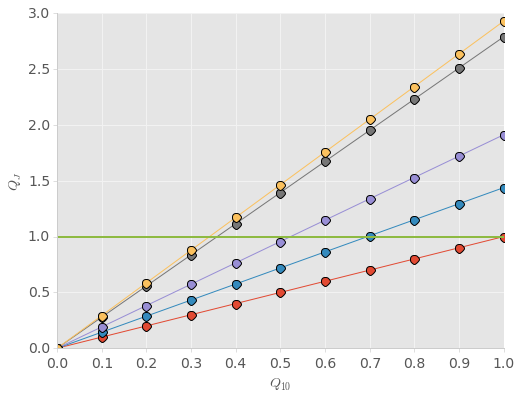

In [178]:
results = []
for q in q10:
    results.append(cost/ cost[0] * q)
    
def plot_results(results, x, top, name='orginal', title=''):
    parameters = { 'linewidth':1, 'ls':'-',
    'marker':'o', 'markersize':9, 'markevery':1, 'mew':1, 
    'alpha':1, 'dash_capstyle':'round'}#,'ls':lines.next()}
    fs = 14
    fig = plt.figure(figsize=(8,6))   
    
    ax = plt.axes()
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.get_xaxis().tick_bottom()  
    ax.spines['bottom'].set_color('.8')
    ax.spines['left'].set_color('.8')
    ax.get_yaxis().tick_left()  

    ax.set_xticklabels(x)

    plt.grid(color='.95', which='major',  linestyle='-', linewidth=1)
    
    plt.xticks(fontsize=fs)  
    plt.yticks(fontsize=fs)
    
    ax.get_yaxis().set_tick_params(which='major', color=".75", direction='out')
    ax.get_xaxis().set_tick_params(which='major', color=".75", direction='out')
      
    plt.locator_params(axis='x', nbins=10)
#     for i,lbl in enumerate(['Q10', 'Q25', 'Q50', 'Q75', 'Q100']):
    a = plt.plot(results, 'o', **parameters)
    plt.plot([top]*len(results), linewidth=2)
    plt.xlabel("$Q_{10}$", fontsize=fs)
    plt.ylabel("$Q_J$", fontsize=fs)
#     plt.title(title)
    plt.legend(loc='best',label=['Q10', 'Q25', 'Q50', 'Q75', 'Q100'])
    plt.savefig("q10-qj-"+name+".pdf", bbox_inches="tight", dpi=200, transparent=True)
    return fig

a = plot_results(results,q10, 1, title='Current Formulation')

## As a function of the Neutrality 

Another option of formulation is to have the numerator of the current formulation transformed by a function. Assuming $f$ and its inverse are increasing functions, and $f(xy) = f(x)f(y)$  

\begin{align}
    \frac{f(U \times Q_k)}{C_k}  & < \frac{f(U \times Q_j)}{C_j} \\ 
    \frac{C_j }{C_k}\times f(U \times Q_k) & < f(U \times Q_j) \\ 
    %f^{-1}\left(\frac{C_j }{C_k}\right) \times U \times Q_k & < U \times Q_j \\ 
\end{align}


An exponential formulation: 
\begin{align}
    \frac{f(U \times Q)}{C} &= \frac{\lambda^{U \times Q}}{C} \\
\end{align}


We want to adjust the importance of the utility and the neutrality of the subinstance to give a better chance to a longer snippet over a very short one. Assuming a utility of $U(\cdot) = 1$:

Our original formulation: 
\begin{align}
    Q_k \frac{C_j}{C_k}  & < Q_j \\
\end{align}

Transforms into:
\begin{align}
    \lambda^{Q_k} \frac{C_j}{C_k}  & < \lambda^{Q_j} \\
\end{align}

$Q_J$ should be large enough to give $J$ a chance of being picked: 
\begin{align}
    \log_{\lambda}\left(\frac{C_j}{C_k}\right) + Q_k & < Q_j \\
\end{align}



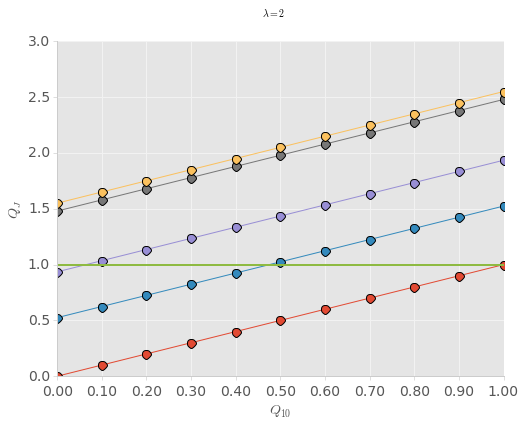

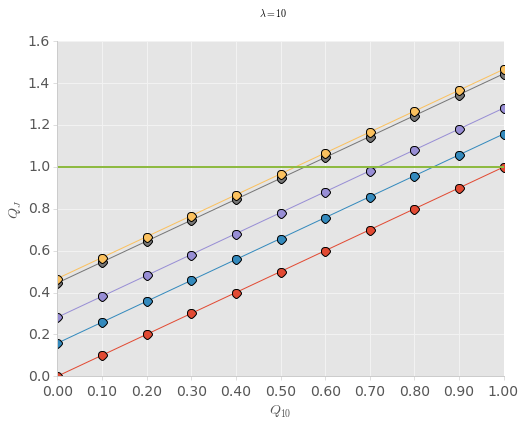

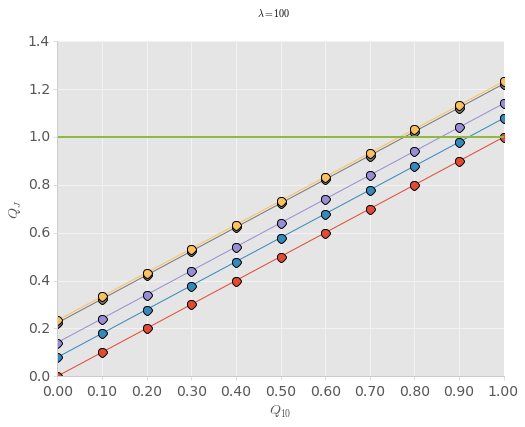

In [174]:
import math

def formulation_lambda(q10, l, cost):
    results = []
    l_q10 = l * q10
    for q in q10:
        results.append([math.log(c / cost[0], l) + q for c in cost])
    return results

a = plot_results(formulation_lambda(q10, 2, cost), ["%.2f"%v for v in q10], 1, name='lambda2')
a.suptitle("$\lambda = 2$")
a=plot_results(formulation_lambda(q10, 10, cost), ["%.2f"%v for v in q10], 1, name='lambda10')
a.suptitle("$\lambda = 10$")
a=plot_results(formulation_lambda(q10, 100, cost), ["%.2f"%v for v in q10], 1, name='lambda100')
a.suptitle("$\lambda = 100$")

In [180]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *

def plot(fig, fname):
    py_fig2 = tls.mpl_to_plotly(fig, resize=True)

    # Delete misplaced legend annotations 
    py_fig2['layout'].pop('annotations', None)

    py_fig2['data'][0].update(name='Q10')
    py_fig2['data'][1].update(name='Q25')
    py_fig2['data'][2].update(name='Q50')

    py_fig2['data'][3].update(name='Q75')

    py_fig2['data'][4].update(name='Q100')
    py_fig2['data'][5].update(name='Q=1')



    # Add legend, place it at the top right corner of the plot
    py_fig2['layout'].update(
        showlegend=True,
        legend=Legend(
            x=1.05,
            y=1
        )
    )

    # Send updated figure object to Plotly, show result in notebook
    bb= py.iplot(py_fig2, filename=fname) 
    return bb

fig = plot_results(formulation_lambda(q10, 10, cost), ["%.2f"%v for v in q10], 1)
plt.title('$f(UQ) = 10^{UQ}$')
plot(fig, 'q10-study-10')


In [181]:
fig = plot_results(formulation_lambda(q10, 100, cost), ["%.2f"%v for v in q10], 1)
plt.title("$f(UQ) = 100^{UQ}$")
plot(fig, 'q10-study-100')


## Logarithmic Formulation

Where $f(U\times Q) = \log_b(U\times Q) $, _replacing_ our original formula we have: 

\begin{align}
    \frac{C_j }{C_k} \log_b \left(Q_k\right) & <  \log_b (Q_j) \\
    \log^{-1}\left(\log(Q_k^{\frac{C_j }{C_k}})\right) & <  \log^{-1} (\log(Q_j)) \\
    Q_k^{\frac{C_j }{C_k}}  < Q_j
\end{align}

where $b > 1$, in the final formula the base $b$ is independent.

In [183]:
def formulation_log(q10, b, cost):
    results = []
    l_q10 = l * q10
    for q in q10:
        results.append([math.pow(1+q,c / cost[0]) for c in cost])
    return results



fig = plot_results(formulation_log(q10, 10, cost), ["%.2f"%v for v in q10], 1, name='logb')
plt.title("Log Formulation $f(UQ) = \log_b(UQ)$")
plot(fig, 'q10-study-logfn')

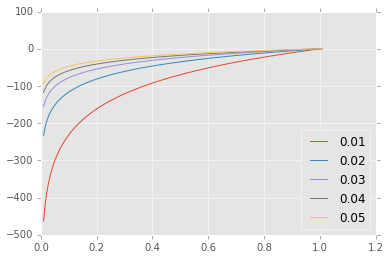

In [212]:

x = np.arange(.01, 1.01, 0.001)
for delta in np.arange(.01,.06,.01):
    plt.plot(x, np.log(x)/np.log(1.+delta), label="%s"%delta)
plt.legend(loc='best')



In [204]:
print [math.log(q,3) for q in q10 if q != 0 ]

[-2.0959032742893844, -1.4649735207179269, -1.0959032742893844, -0.8340437671464696, -0.6309297535714574, -0.46497352071792697, -0.3246595251279622, -0.20311401357501224, -0.09590327428938458, 0.0]
